#KHAI BÁO THƯ VIỆN

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay
)


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer



numpy, pandas: xử lý và phân tích dữ liệu

matplotlib, seaborn: trực quan hóa dữ liệu

sklearn: xây dựng, huấn luyện và đánh giá các mô hình hồi quy

#ĐỌC VÀ MÔ TẢ DỮ LIỆU

In [ ]:
df=pd.read_csv('student-mat.csv', sep=";")
df.head(20)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


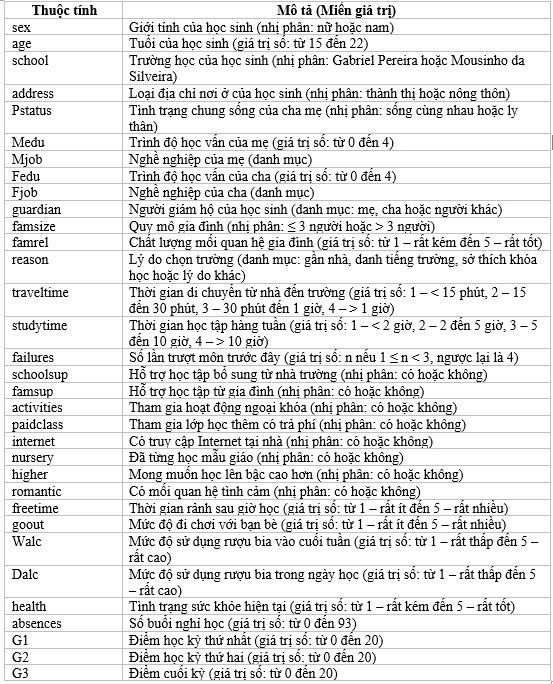

In [ ]:
df.drop(
    columns=["school", "Pstatus", "nursery", "reason", "famrel", "age"],
    errors="ignore",
    inplace=True
)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         395 non-null    object
 1   address     395 non-null    object
 2   famsize     395 non-null    object
 3   Medu        395 non-null    int64 
 4   Fedu        395 non-null    int64 
 5   Mjob        395 non-null    object
 6   Fjob        395 non-null    object
 7   guardian    395 non-null    object
 8   traveltime  395 non-null    int64 
 9   studytime   395 non-null    int64 
 10  failures    395 non-null    int64 
 11  schoolsup   395 non-null    object
 12  famsup      395 non-null    object
 13  paid        395 non-null    object
 14  activities  395 non-null    object
 15  higher      395 non-null    object
 16  internet    395 non-null    object
 17  romantic    395 non-null    object
 18  freetime    395 non-null    int64 
 19  goout       395 non-null    int64 
 20  Dalc      

In [ ]:

df.describe().T


,count,mean,std,min,25%,50%,75%,max
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0
Walc,395.0,2.291139,1.287897,1.0,1.0,2.0,3.0,5.0
health,395.0,3.554430,1.390303,1.0,3.0,4.0,5.0,5.0


In [ ]:
df.nunique().sort_values()

,0
sex,2
address,2
famsize,2
higher,2
famsup,2
paid,2
activities,2
schoolsup,2
romantic,2
internet,2


#PHÂN TÍCH DỮ LIỆU

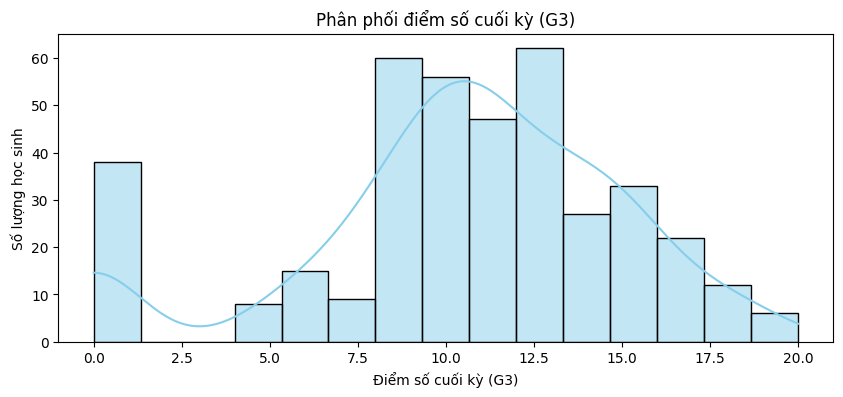

In [ ]:

plt.figure(figsize=(10,4))
sns.histplot(df["G3"], bins=15, kde=True, color="skyblue")
plt.title("Phân phối điểm số cuối kỳ (G3)")
plt.xlabel("Điểm số cuối kỳ (G3)")
plt.ylabel("Số lượng học sinh")
plt.show()

**Nhận xét về biểu đồ phân phối điểm số cuối kỳ (G3)**


Phần lớn học sinh có điểm G3 dao động trong khoảng 8–14 điểm, đây là vùng có mật độ cao nhất trên biểu đồ.

Một số ít học sinh đạt điểm rất thấp (0–5) hoặc rất cao (18–20), cho thấy phân phối có phần trải rộng, nhưng tập trung nhiều ở mức trung bình – khá.

=> Tóm lại:

Điểm trung bình G3 của học sinh nằm khoảng 10–12 điểm.

Đa số học sinh đạt mức trung bình đến khá, chỉ một số ít đạt điểm quá thấp hoặc quá cao.

Phân phối điểm khá hợp lý, cho thấy không có hiện tượng lệch lớn hay bất thường trong dữ liệu.

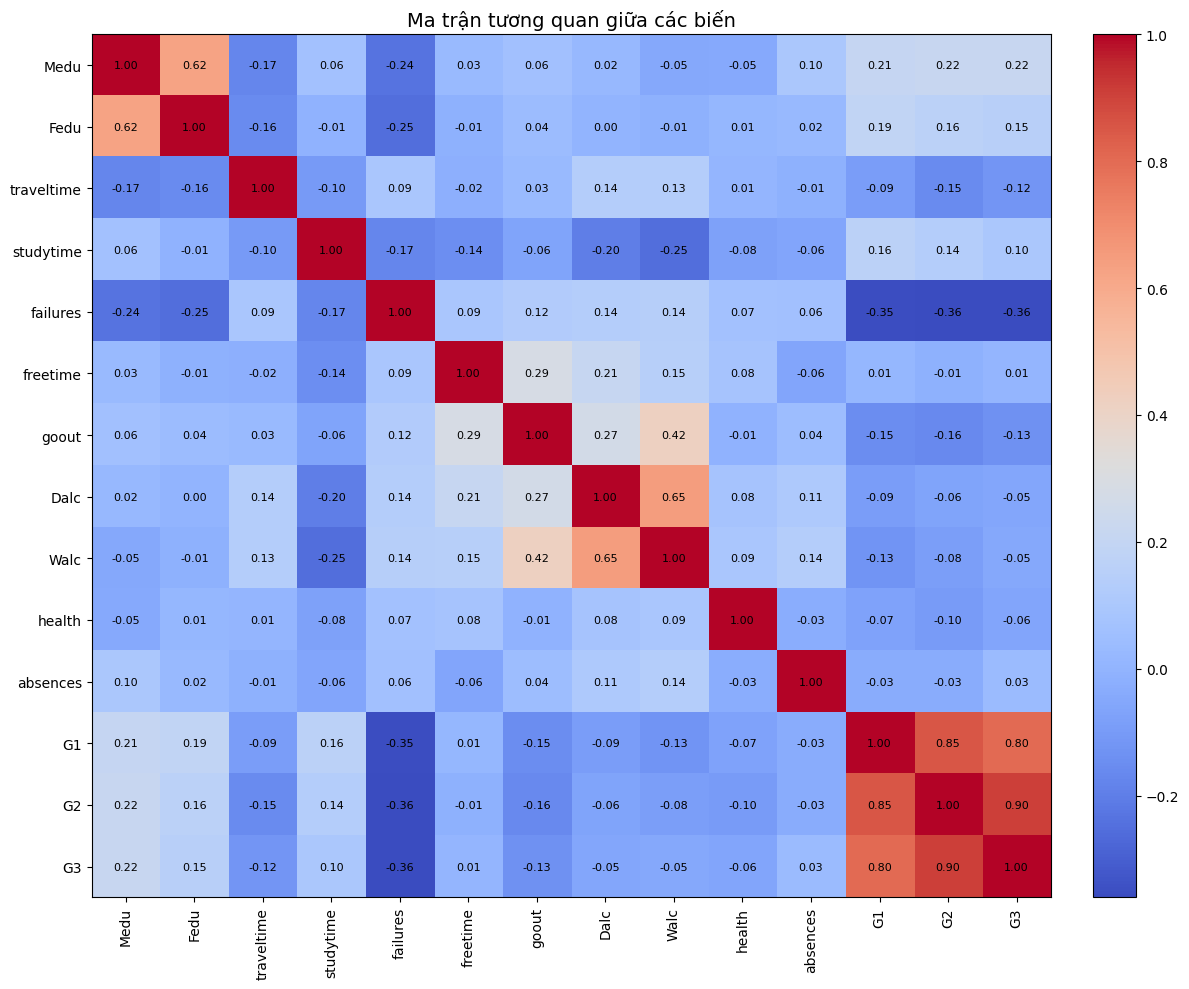

In [ ]:

num_df = df.select_dtypes(exclude="object")
corr = num_df.corr()

plt.figure(figsize=(12, 10))
im = plt.imshow(corr, cmap="coolwarm", aspect="auto")
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        plt.text(
            j, i,
            f"{corr.iloc[i, j]:.2f}",
            ha="center",
            va="center",
            color="black",
            fontsize=8
        )

plt.title("Ma trận tương quan giữa các biến", fontsize=14)
plt.tight_layout()
plt.show()


**Nhận xét về Ma trận tương quan giữa các biến**

🔹 Quan hệ giữa các điểm số (G1, G2, G3)

G1 – G2 (0.85), G2 – G3 (0.90), G1 – G3 (0.80) có tương quan dương rất mạnh.

Điều này cho thấy kết quả học tập giữa các kỳ có tính liên tục cao: học sinh đạt điểm tốt ở kỳ trước thường tiếp tục đạt điểm cao ở kỳ sau.

🔹 Failures và điểm số

Biến failures có tương quan âm khá mạnh với G1, G2 và G3 (khoảng -0.35 đến -0.36).

Điều này phản ánh rằng số lần trượt môn càng nhiều thì điểm số các kỳ càng thấp.

🔹 Thời gian học và điểm số

studytime có tương quan dương nhẹ với các biến điểm số.

Mặc dù mức độ không cao, nhưng cho thấy việc dành nhiều thời gian học hơn có xu hướng cải thiện kết quả học tập.

🔹 Hành vi xã hội và rượu bia

goout, Dalc, Walc có tương quan dương rõ rệt với nhau, đặc biệt:

Dalc – Walc ≈ 0.65

Các biến này có tương quan âm nhẹ với điểm số.

Điều này cho thấy học sinh có xu hướng đi chơi nhiều và sử dụng rượu bia nhiều hơn thường đạt kết quả học tập thấp hơn.

🔹 Trình độ học vấn của cha mẹ

Medu và Fedu có tương quan dương khá mạnh (0.62).

Hai biến này có tương quan dương nhẹ với điểm số học sinh.

Điều này cho thấy môi trường gia đình có ảnh hưởng tích cực đến kết quả học tập, dù mức độ không quá lớn.

🔹 Các yếu tố khác

health, freetime có tương quan yếu với điểm số.

Điều này cho thấy các yếu tố này không ảnh hưởng đáng kể khi xét riêng lẻ.

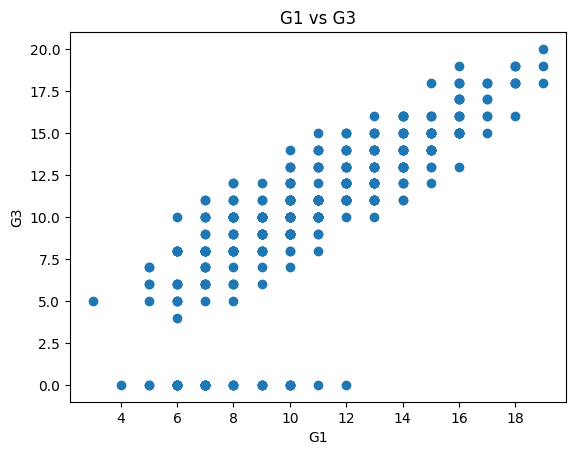

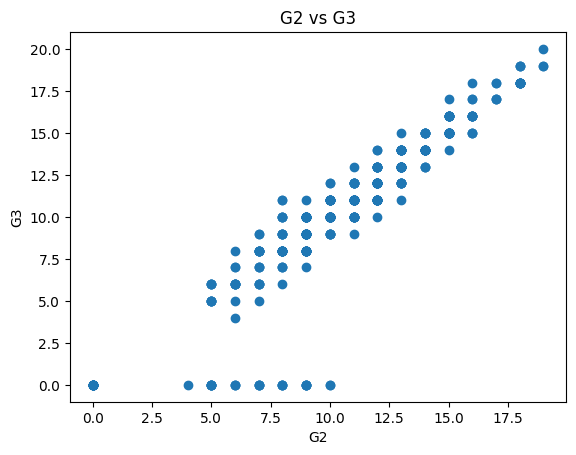

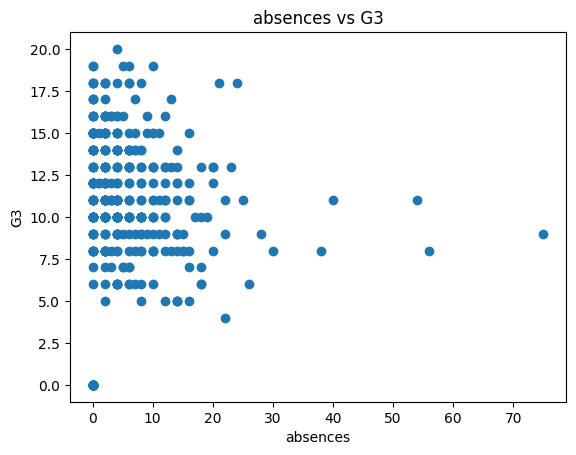

In [ ]:
for col in ["G1", "G2", "absences"]:
    plt.figure()
    plt.scatter(df[col], df["G3"])
    plt.title(f"{col} vs G3")
    plt.xlabel(col)
    plt.ylabel("G3")
    plt.show()


**Nhận xét về 3 biểu đồ scatter**
1. Biểu đồ G1 vs G3

Nhận xét

Khi G1 tăng, thì G3 cũng có xu hướng tăng.

Tuy nhiên, vẫn tồn tại một số trường hợp G1 > 0 nhưng G3 = 0, cho thấy có học sinh không đạt hoặc bỏ thi cuối kỳ.

→ G1 là biến dự báo rất tốt cho G3, phù hợp với kết quả tương quan cao đã quan sát trước đó.

2. Biểu đồ G2 vs G3

Nhận xét

Xu hướng tăng rõ ràng và chặt chẽ hơn so với G1 vs G3.

Ít điểm phân tán hơn, cho thấy G2 dự đoán G3 tốt hơn G1.

Các trường hợp G3 = 0 vẫn tồn tại nhưng số lượng ít hơn.


→ G2 là biến có sức dự báo mạnh nhất đối với G3 trong số các biến được xét.

3. Biểu đồ absences vs G3

Nhận xét

Phần lớn học sinh có số buổi nghỉ thấp (0–20), với điểm G3 trải rộng từ thấp đến cao.

Khi số buổi nghỉ học tăng cao (trên 30), điểm G3 có xu hướng thấp hơn, tuy nhiên số lượng quan sát ở vùng này ít.

Tồn tại các giá trị ngoại lệ (outliers) với số buổi nghỉ rất lớn (trên 50).

→ absences có tác động tiêu cực nhưng yếu đến điểm số, không phải là biến dự báo mạnh khi xét riêng lẻ.

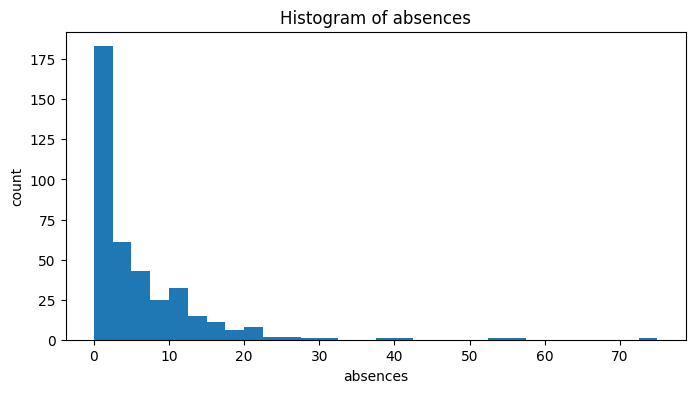

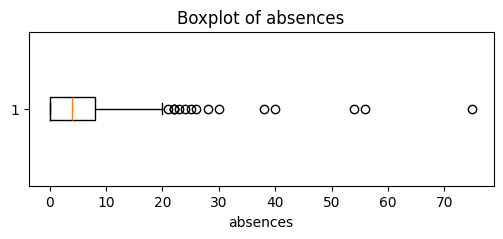

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.hist(df["absences"], bins=30)
plt.title("Histogram of absences")
plt.xlabel("absences"); plt.ylabel("count")
plt.show()

plt.figure(figsize=(6,2))
plt.boxplot(df["absences"], vert=False)
plt.title("Boxplot of absences")
plt.xlabel("absences")
plt.show()


**Nhận xét về phân phối biến absences**
1. Histogram of absences

Nhận xét:

Phân phối số buổi nghỉ học lệch phải rất rõ rệt (right-skewed).

Phần lớn học sinh có số buổi nghỉ thấp, tập trung chủ yếu trong khoảng 0–10 buổi.

Tần suất giảm nhanh khi số buổi nghỉ tăng, cho thấy chỉ có một số ít học sinh nghỉ học nhiều.

Tồn tại các giá trị rất lớn (trên 30, thậm chí trên 70), tạo thành đuôi dài bên phải của phân phối.


2. Boxplot of absences

Nhận xét:

Phần hộp (IQR) nằm ở vùng giá trị thấp, xác nhận rằng 50% học sinh nghỉ học rất ít.

Có nhiều điểm ngoại lệ (outliers) nằm xa về phía bên phải.

Một số ngoại lệ có giá trị rất lớn (trên 50–70 buổi).

Giải thích:

Các ngoại lệ này đại diện cho một nhóm nhỏ học sinh có hành vi nghỉ học bất thường.


/tmp/ipython-input-1746803238.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[feature], y=df["G3"], palette="Set3")
/tmp/ipython-input-1746803238.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[feature], y=df["G3"], palette="Set3")
/tmp/ipython-input-1746803238.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[feature], y=df["G3"], palette="Set3")
/tmp/ipython-input-1746803238.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to 

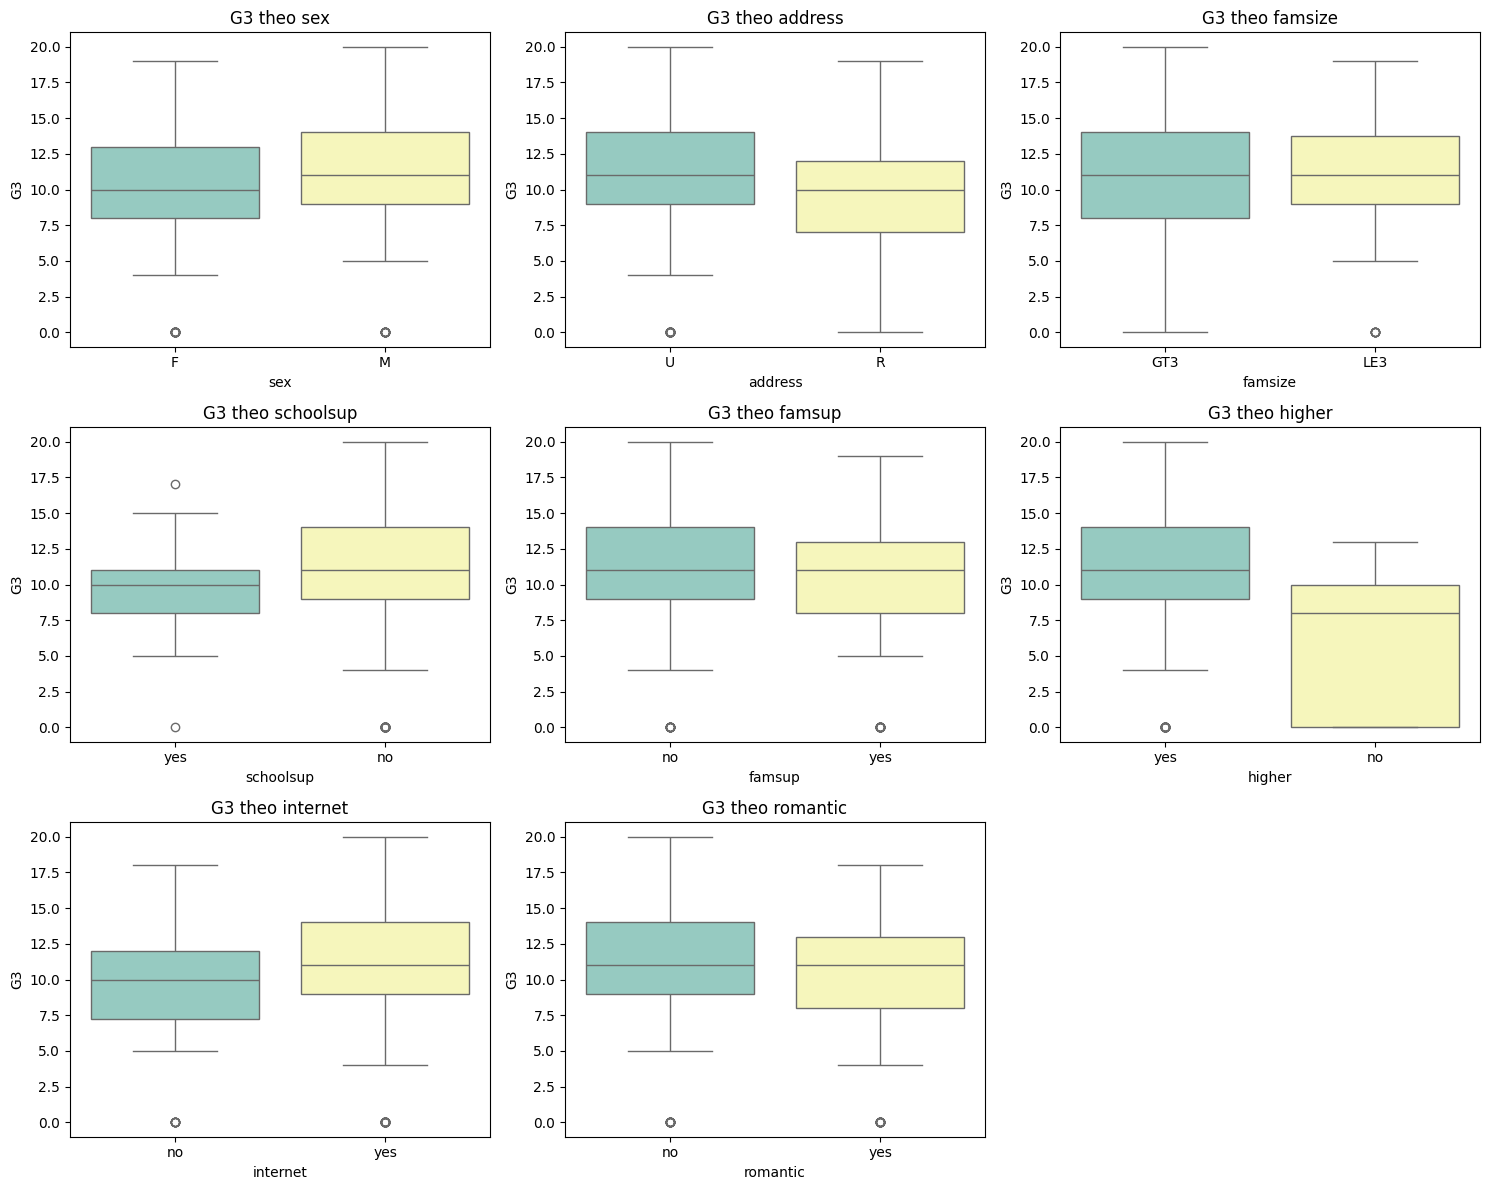

In [ ]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

categorical_nominal = [
    "sex", "address", "famsize",
    "schoolsup", "famsup",
    "higher", "internet", "romantic"
]

n = len(categorical_nominal)
cols = 3
rows = math.ceil(n / cols)

plt.figure(figsize=(cols*5, rows*4))
for i, feature in enumerate(categorical_nominal, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(x=df[feature], y=df["G3"], palette="Set3")
    plt.title(f"G3 theo {feature}")
    plt.xlabel(feature)
    plt.ylabel("G3")

plt.tight_layout()
plt.show()


**Nhận xét về biểu đồ boxplot theo biến nhị phân/phân loại**

🔹 G3 theo giới tính (sex)

Trung vị điểm G3 của nam (M) cao hơn nữ (F) một chút.

Độ phân tán của hai nhóm tương đối tương đồng.

Sự khác biệt giữa hai nhóm không quá rõ rệt.

→ Giới tính không phải yếu tố quyết định mạnh đến điểm số cuối kỳ.

🔹 G3 theo khu vực sinh sống (address)

Học sinh ở khu vực thành thị (U) có trung vị điểm G3 cao hơn so với học sinh ở nông thôn (R).

Nhóm R có nhiều giá trị thấp hơn và phân tán rộng hơn.

→ Điều kiện sống có thể ảnh hưởng nhất định đến kết quả học tập.

🔹 G3 theo quy mô gia đình (famsize)

Hai nhóm gia đình lớn (GT3) và gia đình nhỏ (LE3) có phân phối điểm khá tương đồng.

Trung vị của nhóm LE3 nhỉnh hơn nhẹ.

→ Quy mô gia đình không tạo ra khác biệt rõ ràng về điểm số.

🔹 G3 theo hỗ trợ học tập của trường (schoolsup)

Nhóm không nhận hỗ trợ học tập có trung vị điểm cao hơn nhóm có hỗ trợ.

Nhóm có hỗ trợ xuất hiện nhiều giá trị điểm thấp.

→ Học sinh nhận hỗ trợ thường là nhóm có học lực yếu hơn từ đầu.

🔹 G3 theo hỗ trợ gia đình (famsup)

Phân phối điểm của hai nhóm khá giống nhau.

Trung vị của nhóm không hỗ trợ cao hơn nhẹ.

→ Hỗ trợ gia đình không thể hiện ảnh hưởng rõ rệt khi xét riêng lẻ.

🔹 G3 theo mong muốn học lên cao (higher)

Nhóm có mong muốn học lên cao (yes) có trung vị G3 cao hơn rõ rệt.

Nhóm không có mong muốn học lên cao (no) có nhiều giá trị thấp và độ phân tán lớn.

→ Đây là yếu tố phân loại có ảnh hưởng mạnh nhất đến điểm G3.

🔹 G3 theo điều kiện internet (internet)

Học sinh có internet có trung vị điểm G3 cao hơn nhóm không có.

Tuy nhiên, độ phân tán vẫn lớn và có sự chồng lấn giữa hai nhóm.

→ Internet có ảnh hưởng tích cực nhưng không mang tính quyết định.

🔹 G3 theo tình trạng tình cảm (romantic)

Nhóm không có mối quan hệ tình cảm có trung vị điểm G3 cao hơn.

Nhóm có mối quan hệ có phân phối điểm thấp hơn nhẹ.

→ Tình trạng tình cảm có thể ảnh hưởng tiêu cực nhẹ đến kết quả học tập.

/tmp/ipython-input-110384928.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[feature], y=df["G3"], order=order, palette="Set3")
/tmp/ipython-input-110384928.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[feature], y=df["G3"], order=order, palette="Set3")


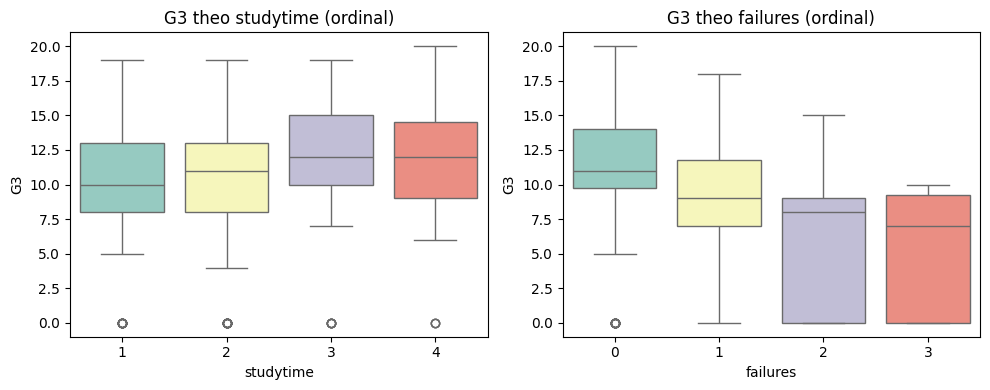

In [ ]:
ordinal_features = ["studytime", "failures"]

plt.figure(figsize=(10,4))
for i, feature in enumerate(ordinal_features, 1):
    plt.subplot(1, 2, i)
    order = sorted(df[feature].unique())
    sns.boxplot(x=df[feature], y=df["G3"], order=order, palette="Set3")
    plt.title(f"G3 theo {feature} (ordinal)")
    plt.xlabel(feature)
    plt.ylabel("G3")

plt.tight_layout()
plt.show()


**Nhận xét về2 biểu đồ boxplot G3 theo biến thứ bậc (ordinal)**
1. G3 theo studytime (ordinal)
Giải thích

Biểu đồ thể hiện sự phân bố điểm số cuối kỳ (G3) theo mức thời gian học của học sinh.
Biến studytime là biến thứ bậc, thường được mã hóa:

1: rất ít

2: ít

3: trung bình

4: nhiều

Nhận xét

Trung vị điểm G3 tăng dần khi mức studytime tăng từ 1 → 4.

Nhóm học sinh có thời gian học cao (3 và 4) đạt điểm G3 cao hơn rõ rệt so với nhóm học ít.

Độ phân tán của các nhóm tương đối tương đồng, cho thấy xu hướng tăng khá ổn định.

Vẫn tồn tại một số giá trị ngoại lệ (G3 = 0) ở tất cả các nhóm.

Kết luận

→ Thời gian học có ảnh hưởng tích cực đến kết quả học tập, tuy mức độ ảnh hưởng ở mức trung bình, không quá mạnh.

2. G3 theo failures

Giải thích

Biểu đồ thể hiện mối quan hệ giữa số lần trượt môn trước đó và điểm số cuối kỳ (G3).
Biến failures là biến thứ bậc, với các mức từ 0 đến 3.

Nhận xét

Khi số lần trượt môn tăng lên, trung vị điểm G3 giảm rõ rệt.

Nhóm không trượt môn (failures = 0) có điểm G3 cao nhất.

Nhóm failures = 2 và 3 có:

Trung vị thấp

Nhiều giá trị bằng 0

Độ phân tán lớn

Xu hướng giảm điểm rất rõ ràng và nhất quán giữa các mức.

Kết luận

→ Số lần trượt môn là yếu tố tiêu cực mạnh nhất ảnh hưởng đến điểm G3 trong các biến ordinal được xét.

#TIỀN XỬ LÝ DỮ LIỆU

In [ ]:
# Kiểm tra missing values
print(df.isnull().sum())

sex           0
address       0
famsize       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
higher        0
internet      0
romantic      0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [ ]:
#chuẩn hóa
#2 cách
#cách 1:  dùng one-hot encoding trả về 0/1 thì có hợp lý không?
#cách 2: dùng label encoding, sau đó sử dụng scale?

In [ ]:
#CÁCH 1:


In [ ]:
# 1) Feature engineering
df_fe = df.copy()
df_fe["absences_log1p"] = np.log1p(df_fe["absences"])
df_fe = df_fe.drop(columns=["absences"])



In [ ]:
# 2) Split
X = df_fe.drop(columns=["G3"])
y = df_fe["G3"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
# 3) Column lists
categorical_cols = X_train.select_dtypes(include=["object"]).columns.tolist()
numeric_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()


In [ ]:
# 4) Preprocess pipeline
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore")),
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols),
    ],
    remainder="drop"
)


In [ ]:
# 5) Sanity check
X_train_t = preprocess.fit_transform(X_train)
X_test_t = preprocess.transform(X_test)

print("Train:", X_train_t.shape)
print("Test:", X_test_t.shape)

Train: (316, 46)
Test: (79, 46)


# CÀI ĐẶT MÔ HÌNH

1. Linear Regression

In [ ]:
def eval_regression(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return {
        "MAE": mean_absolute_error(y_true, y_pred),
        "RMSE": rmse,
        "R2": r2_score(y_true, y_pred)
    }


def run_regression_model(model, model_name):
    pipe = Pipeline([
        ("preprocess", preprocess),
        ("model", model)
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    metrics = eval_regression(y_test, y_pred)
    return {"Model": model_name, **metrics}, pipe

pipe_lr = Pipeline([
    ("preprocess", preprocess),
    ("model", LinearRegression())
])

pipe_lr.fit(X_train, y_train)
y_pred_lr = pipe_lr.predict(X_test)

eval_regression(y_test, y_pred_lr)


{'MAE': 1.6912414827631754,
 'RMSE': np.float64(2.311294151332061),
 'R2': 0.7394748432352363}

2. Lasso Regression

In [ ]:
from sklearn.linear_model import LassoCV

pipe_lasso = Pipeline([
    ("preprocess", preprocess),
    ("model", LassoCV(
        cv=5,
        random_state=42,
        max_iter=10000
    ))
])

pipe_lasso.fit(X_train, y_train)
y_pred_lasso = pipe_lasso.predict(X_test)

eval_regression(y_test, y_pred_lasso)


{'MAE': 1.4878116706377784,
 'RMSE': np.float64(2.146619821176378),
 'R2': 0.7752759797904178}

3. Decision Tree

In [ ]:
pipe_dt = Pipeline([
    ("preprocess", preprocess),
    ("model", DecisionTreeRegressor(random_state=42))
])

pipe_dt.fit(X_train, y_train)
y_pred_dt = pipe_dt.predict(X_test)

eval_regression(y_test, y_pred_dt)


{'MAE': 1.3544303797468353,
 'RMSE': np.float64(2.5482682131353345),
 'R2': 0.6833135373362924}

4. Random Forest

In [ ]:
pipe_rf = Pipeline([
    ("preprocess", preprocess),
    ("model", RandomForestRegressor(
        n_estimators=500,
        random_state=42,
        n_jobs=-1
    ))
])

pipe_rf.fit(X_train, y_train)
y_pred_rf = pipe_rf.predict(X_test)

eval_regression(y_test, y_pred_rf)


{'MAE': 1.212379746835443,
 'RMSE': np.float64(1.9878585768406631),
 'R2': 0.8072873634545057}

#ĐÁNH GIÁ MÔ HÌNH

1. So sánh

In [ ]:

def eval_regression(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return {
        "MAE": mean_absolute_error(y_true, y_pred),
        "RMSE": rmse,
        "R2": r2_score(y_true, y_pred)
    }


models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(
        n_estimators=500, random_state=42, n_jobs=-1
    ),
    "Lasso Regression (L1)": LassoCV(
        cv=5,
        random_state=42,
        max_iter=10000
    )
}



In [ ]:
results = []

for name, model in models.items():
    pipe = Pipeline([
        ("preprocess", preprocess),
        ("model", model)
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    metrics = eval_regression(y_test, y_pred)
    results.append({"Model": name, **metrics})

results_df = pd.DataFrame(results).sort_values("RMSE", ascending=True)
results_df


,Model,MAE,RMSE,R2
2,Random Forest,1.212380,1.987859,0.807287
3,Lasso Regression (L1),1.487812,2.146620,0.775276
0,Linear Regression,1.691241,2.311294,0.739475
1,Decision Tree,1.354430,2.548268,0.683314


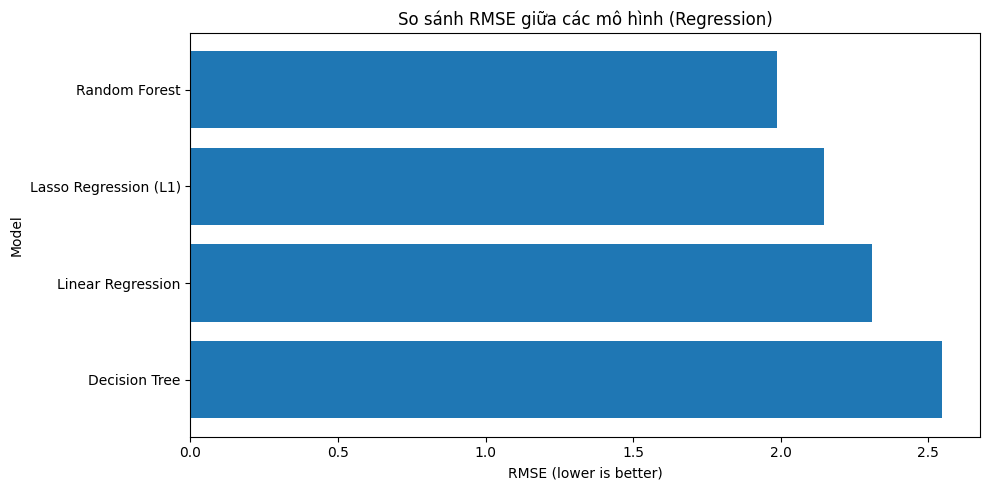

In [ ]:
import matplotlib.pyplot as plt

df_plot = results_df.copy()

plt.figure(figsize=(10, 5))
plt.barh(df_plot["Model"], df_plot["RMSE"])
plt.title("So sánh RMSE giữa các mô hình (Regression)")
plt.xlabel("RMSE (lower is better)")
plt.ylabel("Model")
plt.gca().invert_yaxis()  # model tốt nhất nằm trên cùng
plt.tight_layout()
plt.show()


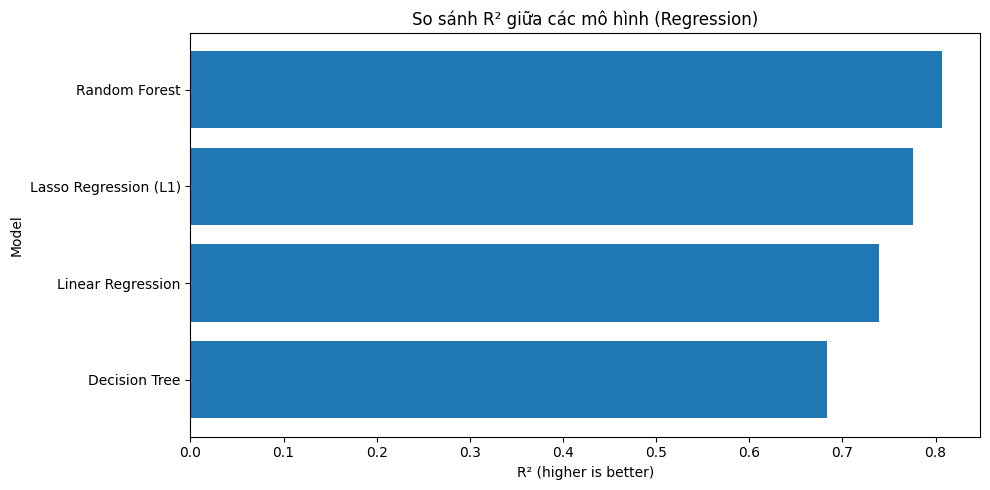

In [ ]:
plt.figure(figsize=(10, 5))
plt.barh(df_plot["Model"], df_plot["R2"])
plt.title("So sánh R² giữa các mô hình (Regression)")
plt.xlabel("R² (higher is better)")
plt.ylabel("Model")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


2. Lựa chọn model tốt nhất

In [ ]:
import matplotlib.pyplot as plt

best_model_name = results_df.iloc[0]["Model"]
print("Best model by RMSE:", best_model_name)



Best model by RMSE: Random Forest


3. Các features quan trọng có ảnh hưởng mạnh mẽ đến G3

In [ ]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

# 1) Train RF pipeline (nếu bạn đã có rf_pipe rồi thì bỏ đoạn fit này)
rf_pipe = Pipeline([
    ("preprocess", preprocess),
    ("model", RandomForestRegressor(n_estimators=500, random_state=42, n_jobs=-1))
])
rf_pipe.fit(X_train, y_train)

# 2) Lấy feature names sau one-hot
# num & cat columns mà preprocess đang dùng
num_cols = preprocess.transformers_[0][2]
cat_cols = preprocess.transformers_[1][2]

ohe = preprocess.named_transformers_["cat"].named_steps["onehot"]
cat_feature_names = ohe.get_feature_names_out(cat_cols)

feature_names = list(num_cols) + list(cat_feature_names)

# 3) Lấy importance và chuyển sang "relative" (%)
importances = rf_pipe.named_steps["model"].feature_importances_
rel_imp = 100 * importances / importances.sum()

imp_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances,
    "relative_importance_%": rel_imp
}).sort_values("relative_importance_%", ascending=False)

imp_df.head(20)


,feature,importance,relative_importance_%
11,G2,0.780902,78.090189
12,absences_log1p,0.118633,11.863321
10,G1,0.007314,0.731386
9,health,0.007256,0.725599
1,Fedu,0.005531,0.553135
30,guardian_mother,0.005469,0.546914
31,guardian_other,0.005447,0.544686
33,schoolsup_yes,0.005069,0.506863
6,goout,0.004878,0.487834
44,romantic_no,0.004826,0.482645


In [ ]:
import re

def to_base_feature(feat):
    # onehot feature có dạng "col_category"
    # ví dụ: schoolsup_yes -> schoolsup
    return feat.split("_")[0] if "_" in feat else feat

imp_base = imp_df.copy()
imp_base["base_feature"] = imp_base["feature"].apply(to_base_feature)

base_rank = (imp_base.groupby("base_feature")["relative_importance_%"]
             .sum()
             .sort_values(ascending=False))

base_rank.head(20)


,relative_importance_%
base_feature,
G2,78.090189
absences,11.863321
guardian,1.184244
schoolsup,0.933313
romantic,0.910896
Mjob,0.806124
G1,0.731386
health,0.725599
Fedu,0.553135


In [ ]:
import joblib

# best_pipe là pipeline bạn đã fit: preprocess + model
joblib.dump(best_pipe, "student_g3.pkl")


['student_g3.pkl']

In [ ]:
import sklearn
print(sklearn.__version__)


1.6.1


#THỬ VỚI BÀI TOÁN: KHÔNG SỬ DỤNG G1, G2
- Target: Điểm G3

- Input: các đặc trưng hành vi / hoàn cảnh (studytime, failures, absences, family, …), KHÔNG CÓ G1,G2

In [ ]:
# =========================
# MODEL B1: EARLY PREDICTION
# Target: G3 (regression)
# Features: KHÔNG dùng G1, G2

# 1) Define X/y for Model B1
X_b1 = df_fe.drop(columns=["G3", "G1", "G2"])
y_b1 = df_fe["G3"]

# 2) Split
X_train_b1, X_test_b1, y_train_b1, y_test_b1 = train_test_split(
    X_b1, y_b1, test_size=0.2, random_state=42
)

print("X_train_b1:", X_train_b1.shape, "X_test_b1:", X_test_b1.shape)


X_train_b1: (316, 24) X_test_b1: (79, 24)


In [ ]:
# 3) Column lists
categorical_cols_b1 = X_train_b1.select_dtypes(include=["object"]).columns.tolist()
numeric_cols_b1 = X_train_b1.select_dtypes(include=[np.number]).columns.tolist()

print("Numeric cols (B1):", len(numeric_cols_b1))
print("Categorical cols (B1):", len(categorical_cols_b1))

# 4) Preprocess pipeline
numeric_transformer_b1 = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
])

categorical_transformer_b1 = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore")),
])

preprocess_b1 = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer_b1, numeric_cols_b1),
        ("cat", categorical_transformer_b1, categorical_cols_b1),
    ],
    remainder="drop"
)


Numeric cols (B1): 11
Categorical cols (B1): 13


In [ ]:
# 5) Sanity check
X_train_b1_t = preprocess_b1.fit_transform(X_train_b1)
X_test_b1_t = preprocess_b1.transform(X_test_b1)

print("Train (B1):", X_train_b1_t.shape)
print("Test  (B1):", X_test_b1_t.shape)


Train (B1): (316, 44)
Test  (B1): (79, 44)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def eval_regression(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return {
        "MAE": mean_absolute_error(y_true, y_pred),
        "RMSE": rmse,
        "R2": r2_score(y_true, y_pred)
    }


In [ ]:
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

models_b1 = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(
        n_estimators=500, random_state=42, n_jobs=-1
    ),
    "Lasso Regression (L1)": LassoCV(
        cv=5,
        random_state=42,
        max_iter=10000
    )
}

results_b1 = []

for name, model in models_b1.items():
    pipe = Pipeline([
        ("preprocess", preprocess_b1),
        ("model", model)
    ])

    pipe.fit(X_train_b1, y_train_b1)
    y_pred = pipe.predict(X_test_b1)

    metrics = eval_regression(y_test_b1, y_pred)
    results_b1.append({"Model": name, **metrics})

results_df_b1 = pd.DataFrame(results_b1).sort_values("RMSE", ascending=True)
results_df_b1


,Model,MAE,RMSE,R2
2,Random Forest,2.979038,3.837305,0.281889
0,Linear Regression,3.383695,4.191797,0.143081
3,Lasso Regression (L1),3.419416,4.233886,0.125786
1,Decision Tree,3.620253,4.695810,-0.075376


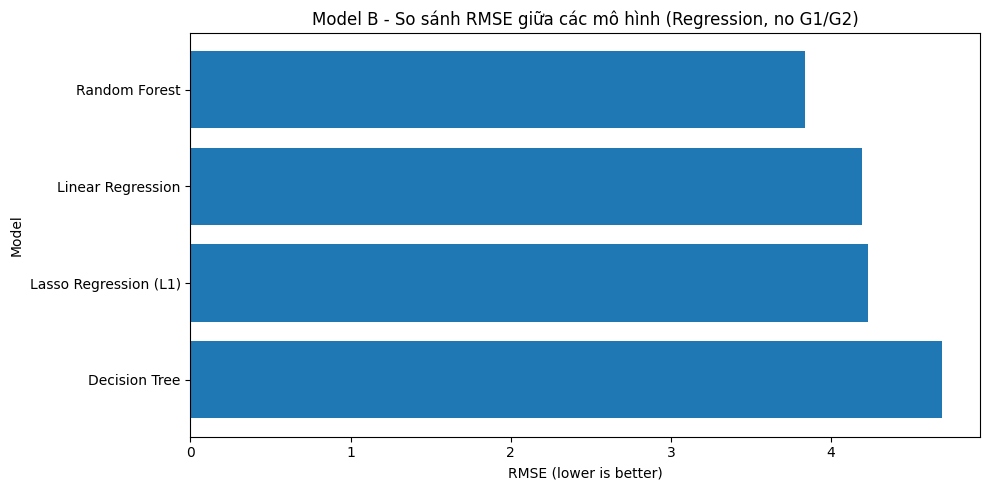

In [ ]:
df_plot_b1 = results_df_b1.copy()

plt.figure(figsize=(10, 5))
plt.barh(df_plot_b1["Model"], df_plot_b1["RMSE"])
plt.title("Model B - So sánh RMSE giữa các mô hình (Regression, no G1/G2)")
plt.xlabel("RMSE (lower is better)")
plt.ylabel("Model")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


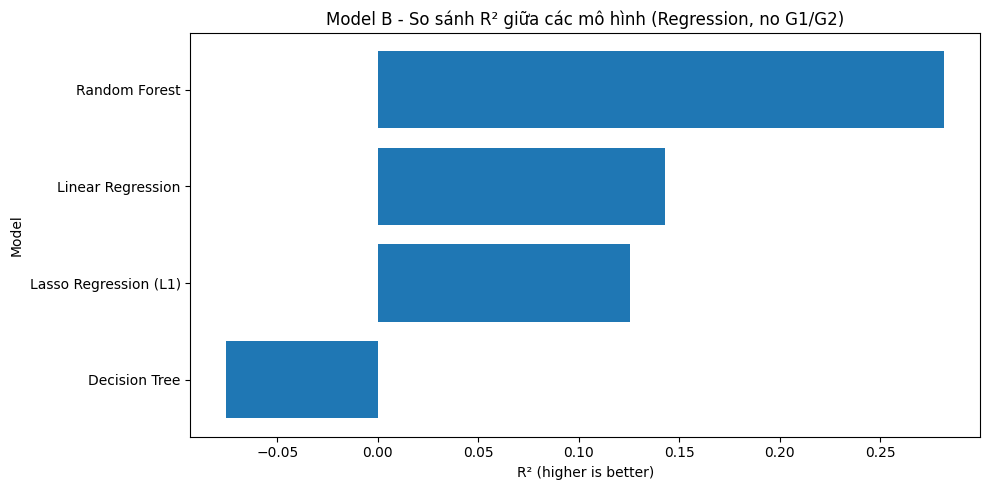

In [ ]:
plt.figure(figsize=(10, 5))
plt.barh(df_plot_b1["Model"], df_plot_b1["R2"])
plt.title("Model B - So sánh R² giữa các mô hình (Regression, no G1/G2)")
plt.xlabel("R² (higher is better)")
plt.ylabel("Model")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [ ]:
best_model_name_b1 = results_df_b1.iloc[0]["Model"]
print("Model B - Best model by RMSE:", best_model_name_b1)



Model B - Best model by RMSE: Random Forest


In [ ]:
# Train RF pipeline (để lấy feature importance)
rf_pipe_b1 = Pipeline([
    ("preprocess", preprocess_b1),
    ("model", RandomForestRegressor(n_estimators=500, random_state=42, n_jobs=-1))
])
rf_pipe_b1.fit(X_train_b1, y_train_b1)

# Lấy feature names sau one-hot
# Cách đúng: lấy ColumnTransformer đã fit nằm trong pipeline
pre_b1_fitted = rf_pipe_b1.named_steps["preprocess"]

num_cols_b1 = pre_b1_fitted.transformers_[0][2]
cat_cols_b1 = pre_b1_fitted.transformers_[1][2]

ohe_b1 = pre_b1_fitted.named_transformers_["cat"].named_steps["onehot"]
cat_feature_names_b1 = ohe_b1.get_feature_names_out(cat_cols_b1)

feature_names_b1 = list(num_cols_b1) + list(cat_feature_names_b1)

# Importance
importances_b1 = rf_pipe_b1.named_steps["model"].feature_importances_
rel_imp_b1 = 100 * importances_b1 / importances_b1.sum()

imp_df_b1 = pd.DataFrame({
    "feature": feature_names_b1,
    "importance": importances_b1,
    "relative_importance_%": rel_imp_b1
}).sort_values("relative_importance_%", ascending=False)

imp_df_b1.head(20)


,feature,importance,relative_importance_%
10,absences_log1p,0.193882,19.388249
4,failures,0.148249,14.824913
9,health,0.062448,6.244837
6,goout,0.055014,5.501447
1,Fedu,0.036997,3.699693
5,freetime,0.036288,3.628832
3,studytime,0.035481,3.548102
8,Walc,0.032397,3.239744
2,traveltime,0.032291,3.229097
0,Medu,0.030862,3.086169


In [ ]:
import joblib
joblib.dump(best_pipe_b1, "student_g3_model_b1_no_g1g2.pkl")


['student_g3_model_b1_no_g1g2.pkl']